# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [6]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [7]:
# Check out the dataset for now 
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## Is the distribution of body temperatures normal?

In [24]:
## plotting preparations
sns.set_style("whitegrid")
sns.color_palette('RdBu')
sns.set_palette('RdBu')

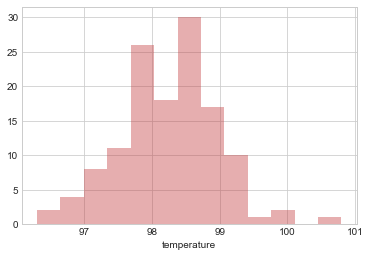

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
plot=sns.distplot(df.temperature, 
            kde = False)
plt.show()  

Proportion between 1 SD: 0.692
Proportion between 2 SD: 0.946
Proportion between 3 SD: 0.992


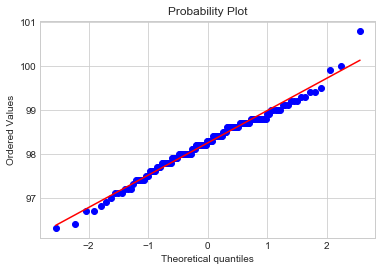

In [43]:
## Looks like the distribution is almost normal, with some skew to the left
## Let's check deeper using the 68-95-99 rule
import numpy as np
temp_mean = np.mean(df.temperature)
temp_sd = np.std(df.temperature)

print "Proportion between 1 SD:", round(float(len(df[(df.temperature <= temp_mean + temp_sd) & (df.temperature >= temp_mean - temp_sd)]))/len(df),3)
print "Proportion between 2 SD:", round(float(len(df[(df.temperature <= temp_mean + 2*temp_sd) & (df.temperature >= temp_mean - 2*temp_sd)]))/len(df),3)
print "Proportion between 3 SD:", round(float(len(df[(df.temperature <= temp_mean + 3*temp_sd) & (df.temperature >= temp_mean - 3*temp_sd)]))/len(df),3)


## Use QQ-plot
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(df.temperature, dist="norm", plot=pylab)
pylab.show()

### Is the sample size large? Are the observations independent?

In [27]:
len(df)
## so the of observations is around 130. hence it's not huge, but should be sufficient

130

### Is the true population mean really 98.6 degrees F?

In [50]:
from statsmodels.stats.weightstats import ztest
print temp_mean
ztest(df.temperature,value=98.6)
stats.ttest_1samp(df.temperature,98.6)

## both t test and z test reject the null hypothesis that the mean is 98.6

98.2492307692


Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

### At what temperature should we consider someone's temperature to be "abnormal"?

In [57]:
## assuming that the temperature is a normal distribution, 
## let's say someone's temperature is abnormal if it is outside the middle 95% percentile
n = len(df)
normal_range = [round((temp_mean - 1.96 * temp_sd / np.sqrt(n)),2),round((temp_mean + 1.96 * temp_sd / np.sqrt(n)),2)]
normal_range

[98.12, 98.37]

### Is there a significant difference between males and females in normal temperature?

In [60]:
female_temps = np.array(df.temperature[df.gender=='F']) #previously got values and cast to list
male_temps = np.array(df.temperature[df.gender=='M'])

print(len(male_temps))
print(len(female_temps))
stats.ttest_ind(female_temps,male_temps)

## the small p value shows that there's indeed a difference

65
65


Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)